1. visualizzare il numero totale di record presenti nel file

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


In [ ]:
df['numero_dosi'].sum()


99954043

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
insert = input()
df[df['nome_area']==insert].count()['area']

Umbria


147

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
if insert in df.values:
  print(df[df['nome_area']==insert].count()['area'])
else:
  print('valore non identificato')

147


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente


In [ ]:
df[df['nome_area']==insert]['numero_dosi'].sum()

1469397

5. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby('fornitore')['numero_dosi'].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
df[df['nome_area']==insert].groupby('fornitore',as_index=False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]

,fornitore,numero_dosi
2,Pfizer/BioNTech,1025395
1,Moderna,230785
3,Vaxzevria (AstraZeneca),180167
0,Janssen,33050


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

<BarContainer object of 4 artists>

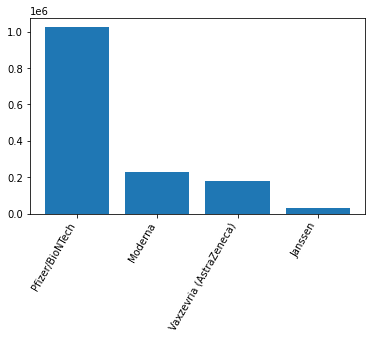

In [ ]:
date = df[df['nome_area']==insert].groupby('fornitore',as_index=False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]
fig = plt.figure()
ax = plt.axes()

fig.autofmt_xdate(rotation=60)
ax.bar(date['fornitore'],date['numero_dosi'])

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

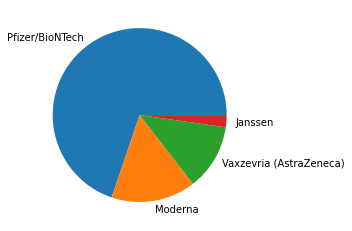

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.pie(date['numero_dosi'],labels=date['fornitore'])
plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap

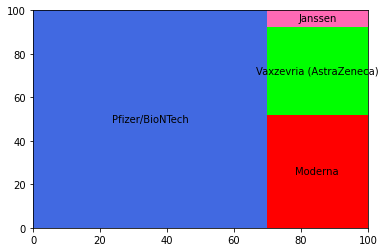

In [ ]:
!pip install squarify
import squarify as sqrfy

fig = plt.figure()
ax = plt.axes()

sqrfy.plot(date['numero_dosi'],label=date['fornitore'],color=['royalblue','red','lime','hotpink'])

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
df.groupby('nome_area')['numero_dosi'].sum()[df.groupby('nome_area')['numero_dosi'].sum() < df.groupby('nome_area')['numero_dosi'].sum().mean()]

nome_area
Abruzzo                               2267252
Basilicata                             936665
Calabria                              2902284
Friuli-Venezia Giulia                 2031903
Liguria                               2547002
Marche                                2507456
Molise                                 506050
Provincia Autonoma Bolzano / Bozen     793879
Provincia Autonoma Trento              878910
Sardegna                              2751776
Umbria                                1469397
Valle d'Aosta / Vallée d'Aoste         191150
Name: numero_dosi, dtype: int64

11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico